In [1]:
#!pip install h2o

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import h2o
from h2o.automl import H2OAutoML

h2o.__version__

'3.30.1.3'

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "14.0.2" 2020-07-14; OpenJDK Runtime Environment (build 14.0.2+12); OpenJDK 64-Bit Server VM (build 14.0.2+12, mixed mode)
  Starting server from /usr/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpe0jofz70
  JVM stdout: /tmp/tmpe0jofz70/h2o_javi_started_from_python.out
  JVM stderr: /tmp/tmpe0jofz70/h2o_javi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_javi_fxtpjr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.898 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


# Leer datos

In [3]:
train_df = pd.read_csv("../data/house-prices-train.csv")
test_df  = pd.read_csv("../data/house-prices-test.csv") # No teine columna target

print("Filas train:", len(train_df))
print("Filas test:",  len(test_df))

train_df.head()

Filas train: 1460
Filas test: 1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Dividir train en train,valid

In [5]:
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=0)
print("Filas train:", len(train_df))
print("Filas valid:", len(valid_df))

Filas train: 1168
Filas valid: 292


# Pandas dataframe -> H2OFrame

In [6]:
train = h2o.H2OFrame(train_df)
valid = h2o.H2OFrame(valid_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


### Identify predictors and response

In [7]:
x = train.columns
y = "SalePrice"
x.remove(y)

### Run AutoML for 20 base models (limited to 1 hour max runtime by default)

In [8]:
#aml = H2OAutoML(max_models=20, seed=1)
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### View the AutoML Leaderboard & Print all rows instead of default (10 rows)

In [9]:
lb = h2o.automl.get_leaderboard(aml, extra_columns='ALL')
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
GBM_grid__1_AutoML_20201109_121409_model_5,7.15465e+08,26748.2,7.15465e+08,15804,0.130769,293,0.021146
StackedEnsemble_BestOfFamily_AutoML_20201109_121409,7.18752e+08,26809.6,7.18752e+08,15363.8,0.127107,169,0.024743
GBM_grid__1_AutoML_20201109_121409_model_6,7.49241e+08,27372.3,7.49241e+08,15999.9,0.133496,270,0.015306
GBM_grid__1_AutoML_20201109_121409_model_4,7.69657e+08,27742.7,7.69657e+08,16491.2,0.136583,257,0.016412
GBM_grid__1_AutoML_20201109_121409_model_1,7.76825e+08,27871.6,7.76825e+08,16554.4,0.137032,149,0.010459
GBM_grid__1_AutoML_20201109_121409_model_7,7.94703e+08,28190.5,7.94703e+08,16741.6,0.140011,96,0.008931
StackedEnsemble_AllModels_AutoML_20201109_121409,8.37966e+08,28947.6,8.37966e+08,15144,0.127227,235,0.081606
GBM_grid__1_AutoML_20201109_121409_model_2,8.62602e+08,29370.1,8.62602e+08,16633,0.136081,240,0.013182
GBM_3_AutoML_20201109_121409,8.64935e+08,29409.8,8.64935e+08,16994.2,0.141121,199,0.00874
GBM_4_AutoML_20201109_121409,8.8553e+08,29757.9,8.8553e+08,17678.8,0.14622,211,0.007776


# Obtener mejor modelo

In [10]:
best_model = aml.leader

# Obtener modelos concretos

In [11]:
model_names = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

best_ensemble     = h2o.get_model(model_names[2]) # Coger indices
best_single_model = h2o.get_model(model_names[0]) # Coger indices

# Predecir cjto. de test

In [12]:
preds = best_model.predict(valid)
preds

gbm prediction progress: |████████████████████████████████████████████████| 100%


/usr/lib/python3.8/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'Condition2' has levels not trained on: [RRAn, RRNn]
  warnings.warn(w)
/usr/lib/python3.8/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'RoofMatl' has levels not trained on: [ClyTile]
  warnings.warn(w)
/usr/lib/python3.8/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'Functional' has levels not trained on: [Sev]
  warnings.warn(w)
/usr/lib/python3.8/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'MiscFeature' has levels not trained on: [TenC]
  warnings.warn(w)


predict
281450
152512
107076
227861
91492.3
89994.8
261349
115683
481280
156202


# MAE = +-16774$

In [30]:
y_true = valid_df.SalePrice.reset_index(drop=True)
y_pred = preds.as_data_frame()["predict"]

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

16774.365840644947

<AxesSubplot:xlabel='SalePrice', ylabel='predict'>

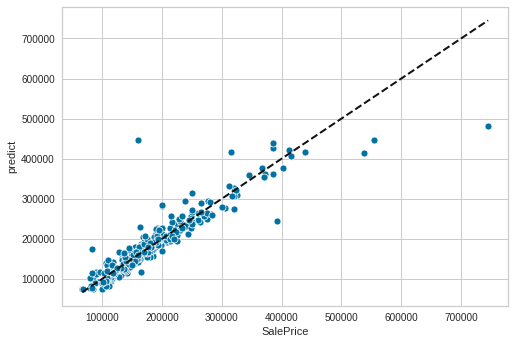

In [52]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
sb.scatterplot(y_true, y_pred)

<AxesSubplot:xlabel='SalePrice'>

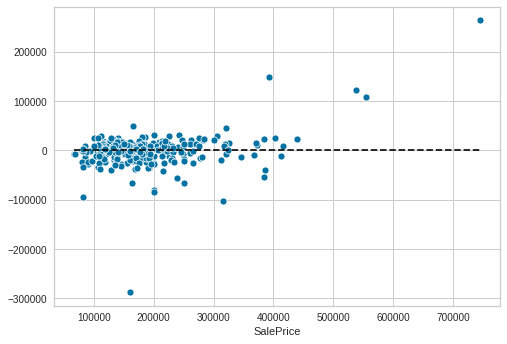

In [65]:
residuals = y_true - y_pred

plt.hlines(y=0, xmin=y_true.min(), xmax=y_true.max(), color='k', linestyles="dashed")
sb.scatterplot(y_true, residuals)